### Module 11 - Practical Application Assignment 11.1 - by Paul Jibrail

Associated Files and Directories
- This Jupyter Notebook File: Paul_Jibrail_prompt_II.ipynb
- README file (findings summary): README
- Data File: data/vehicles.csv
- Image Files: images/kurt.jpg, images/crisp.png


# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


*To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.*

# Business Understanding

*From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.*

- What specific data set features that represent car characteristics will impact the price of the can in a positive direction; increase price significantly

- What specific data set features that represent car characteristics will impact the price of the can in a negative direction; reduce price significantly

- What specific data set features that represent car characteristics will have a negligible price impact

- Result of the process would be able to tell the used car dealer what car characteristics/factors are most impactful to price which could help them with marketing and pricing stragies

# Data Understanding

*After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.*

- Obtain a data set that represents many car types and brands along with a common group of features that may or may not impact price greatly

- After reviewing the data a hypothesis would be that **size** of vehicle will increase the price of the car

- After reviewing the data a hypothesis would be the **condition** of the vehicle would increase the price of the car

- After reviwing the data a hypothesis would be some brands considered **luxury of vehicles** would increase the price of the car

- After reviewing the data a hypothesis would be the **engine** size could increase the vehicle price of the car

- After reviewing the data a hypothesis would be the **age** of the car impacts price, with the younger being more valuable

- Though with these hypotheses it is not clear from initial inspection which features impact price the most or which are correlated to others. That will have to come from data modelling

- At this point I have noticed many data cells with no data and a very large quantity of data I will consider dropping some data and potentially removing some features as necessary in the Data Preparation Phase.  I noticed in the picture the used car salesmans is from the movie Used Cars and that was based in Arizona and had one location. Since that is his customer base and it allows me to pair down my data for ease of process from 426,880 with many features. **I will only focus on the state of Arizona for my data set.**

# Data Preparation

*After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.*

- *Visually review the data set for imbalances in the data provided; e.g., does one care brand/model represent most of the data versus other models which could skew predictions*

Imports for code building

In [164]:
# loads and imports all modules needed for assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from scipy.stats import skew

# sets display setting
from sklearn import set_config
set_config(display="diagram")

Loads the provided vehicles csv data file into a Pandas data frame

In [165]:
vehicles1 = pd.read_csv('data/vehicles.csv')

Display data and conducted initial visual data exploration - I identified the following:
- There are 426,800 samples across 18 features
- There are many samples with NaN values
- The data spans several states
- There are many ordinal and nominal data types; discrete data
- There are id and VIN features that are of no value to the objective
- The number of samples could be excessive for downstream processing and the necessary data scope for one used car dealer in Arizona
- There are several data types that are not integer or float which will need to be adjusted for effective modeling

In [166]:
# Displays the full data set in the form of a Pandas data frame - 426,600 samples and 18 features
vehicles1

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


### Data Set Re-scoping and Narrowing
- Based on the movie the picture represents, that is a used car dealer in Arizona, I chose to reduce the data set to only the samples for the state of Arizona. This will also help with running downstream modeling activities, though still provide the customer an effective result.


Therefore, I reduced the data set to just the state of Arizona data samples only with the following code:

In [167]:
# Counts the numbre of Arizona state samples and displays the count
value_counts = (vehicles1['state'] == 'az').value_counts()
print(value_counts)

state
False    418201
True       8679
Name: count, dtype: int64


In [168]:
# Selects the Arizona state samples with their features from vehicles1 and creates a new data frame named df_arizona
df_arizona = vehicles1[vehicles1['state'].str.lower() == 'az'] 

In [169]:
# Resulting data frame now has 8,679 samples and 18 features
df_arizona.shape

(8679, 18)

In [170]:
# After other states samples dropped reset the data frames index.
df2_arizona = df_arizona.reset_index(drop=True)

In [171]:
# Displays the data frames attributes, post Arizona samples obstraction
df2_arizona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8679 entries, 0 to 8678
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8679 non-null   int64  
 1   region        8679 non-null   object 
 2   price         8679 non-null   int64  
 3   year          8613 non-null   float64
 4   manufacturer  8298 non-null   object 
 5   model         8554 non-null   object 
 6   condition     5690 non-null   object 
 7   cylinders     5522 non-null   object 
 8   fuel          8614 non-null   object 
 9   odometer      8599 non-null   float64
 10  title_status  8534 non-null   object 
 11  transmission  8655 non-null   object 
 12  VIN           5315 non-null   object 
 13  drive         6098 non-null   object 
 14  size          2375 non-null   object 
 15  type          7060 non-null   object 
 16  paint_color   6253 non-null   object 
 17  state         8679 non-null   object 
dtypes: float64(2), int64(2), obj

The resulting data set after just obstracting the state of Arizona is now 8,679 samples - data is named df2_arizona

### Now I used the following guidelines to conduct the data prep and cleaning

- Look for feature columns that are missing a majority of their values where dropping samples does not remove them; consider dropping the feature

- Consider the necessity of the data set size and if my system and available processing resources can process it effectively, consider reducing the size without impacting having a large enough data set for good results


- Review the data set for ordinal and nominal types and consider how to adjust their representation for processing

- Review the data to see major gaps in the data where there are missing and NaN values

- I reviewed the data to find redundant values with different names, where it is obvious they refer to the same value with a different name, did a quick search and replace to make names consistent

- Look for data set features that are redundant or irrelevant to the problem we are trying to solve, potentially dropping them in data preparation

### Starting Data Prep and Cleaning Here

I reviewed the non-null counts per feature. The feature 'size' had only 2,375 non nulls in contrast to the full set of 8,678. I thought of dropping it, however, I think the tradeoff of dropping about 4000 samples and keeping the feature is a better choice. I believe 'size' will likely be a key indicator of price, so I kept the 'size' feature and dropped all samples with NaN.

In [172]:
df2_arizona

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7316781278,flagstaff / sedona,4850,2007.0,honda,odyssey ex,good,6 cylinders,gas,122100.0,clean,automatic,5FNRL38487B031838,fwd,full-size,mini-van,blue,az
2,7316722465,flagstaff / sedona,8000,2005.0,ford,f-250 super duty king ranch,fair,8 cylinders,diesel,435000.0,clean,automatic,NaN,4wd,NaN,NaN,white,az
3,7316661311,flagstaff / sedona,18990,2020.0,chevrolet,spark activ hatchback,good,NaN,gas,6395.0,clean,other,KL8CH6SA8LC462333,fwd,NaN,hatchback,black,az
4,7316661307,flagstaff / sedona,32590,2015.0,mercedes-benz,gla-class gla 45,good,NaN,gas,34811.0,clean,other,WDDTG5CB9FJ051220,NaN,NaN,other,black,az
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,7302458896,yuma,54995,2016.0,ford,f-250 super duty lariat,NaN,8 cylinders,other,56725.0,clean,automatic,1FT7W2BT6GEA01232,4wd,NaN,pickup,blue,az
8675,7302457903,yuma,0,2017.0,jeep,wrangler unlmited sahara,NaN,6 cylinders,gas,51064.0,clean,automatic,1C4HJWEG3HL585711,4wd,NaN,SUV,silver,az
8676,7302457174,yuma,51995,2017.0,ford,f-250 super duty xlt lifted crew,NaN,8 cylinders,other,85201.0,clean,automatic,1FT7W2BT7HEE28596,4wd,NaN,pickup,white,az
8677,7301801355,yuma,9200,2007.0,NaN,Hummer H3,excellent,5 cylinders,gas,170000.0,rebuilt,automatic,NaN,NaN,NaN,NaN,black,az


In [173]:
df3_arizona = df2_arizona.dropna()

In [174]:
df3_arizona = df3_arizona.reset_index(drop=True)

In [175]:
df3_arizona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            600 non-null    int64  
 1   region        600 non-null    object 
 2   price         600 non-null    int64  
 3   year          600 non-null    float64
 4   manufacturer  600 non-null    object 
 5   model         600 non-null    object 
 6   condition     600 non-null    object 
 7   cylinders     600 non-null    object 
 8   fuel          600 non-null    object 
 9   odometer      600 non-null    float64
 10  title_status  600 non-null    object 
 11  transmission  600 non-null    object 
 12  VIN           600 non-null    object 
 13  drive         600 non-null    object 
 14  size          600 non-null    object 
 15  type          600 non-null    object 
 16  paint_color   600 non-null    object 
 17  state         600 non-null    object 
dtypes: float64(2), int64(2), objec

I noticed in the samples for the feature 'year' there were many years that only had 2 or less records. I think this are outliers of sorts and could skew the data too much. So I deleted them.

The next few code cells remove the features of: 'VIN', 'id', 'state', 'model', my reasoning:
- Removed 'VIN' since it offers no value to the customer objective - specific car ids does not matter
- Removed 'id' since it offers no value to the customer objective - specific car ids does not matter
- Removed 'state' since the data set was reduced to just Arizona - the state column no longer offers any value
- Removed 'model' the vales were a mis mash of values, imbalanced, and low quality, would also no value to objective

In [176]:
# Creates new data frame post VIN drop
df4_arizona = df3_arizona.drop('VIN', axis=1)

I removed the 'VIN' feature since vin numbers are irrevelent to the objective and could just take up processing cycles

In [177]:
# Creates new data frame post id drop
df5_arizona = df4_arizona.drop('id', axis=1)

I removed the 'id' feature since I already have an index and 'id' serves no purpose to the objective

In [178]:
# Creates new data frame post state drop
df6_arizona = df5_arizona.drop('state', axis=1)

Since we are only focused on data and a data set that contains the state of Arizona vehicles the state column is irrelevant, dropped it

In [179]:
# Creates new data frame post model drop
df7_arizona = df6_arizona.drop('model', axis=1)

The model was a mishmash of different brands and poorly labeled data, would only mislead or not add value to the objective, dropped it

In [180]:
# Only showing this one cell to represent many runs of the value_counts function - to determine the quality and need to keep data
value_counts = df10_arizona['cylinders'].value_counts()
print(value_counts)

cylinders
4     224
6     196
8     163
5       5
10      3
3       1
Name: count, dtype: int64


I dropped the one sample/record for type of 'bus' so it would not overly impact results

In [181]:
df8_arizona = df7_arizona[df7_arizona['type'] != 'bus']


Removes the 'type' feature values equal to 'offroad' since it conflicted with another values logic and was only a couple samples

In [182]:
# Creates a new data frame with all 'type' features that have a value other than 'offroad'
df9_arizona = df8_arizona[df8_arizona['type'] != 'offroad']

Had to reset the index after the rows that were dropped

In [183]:
# Resets index post changes above
df9_arizona = df9_arizona.reset_index(drop=True)

Set 'year' and 'odometer' features to int32 data type from float64 - better choice and will benefit downstream processing

In [184]:
# Sets a new data type to int32 for 'year'
df9_arizona['year'] = df9_arizona['year'].astype('int32')

In [185]:
# Sets a new data type to int32 for 'odometer'
df9_arizona['odometer'] = df9_arizona['odometer'].astype('int32')

There were only a few samples for 'cyclinders' that were set to a value of 'other' - removed them - then reset index

In [186]:
# Creates new data frame without the samples that have a feature 'cylinders' equal to 'other'
df10_arizona = df9_arizona[df9_arizona['cylinders'] != 'other']

In [187]:
# Resets the data frames index
df10_arizona = df10_arizona.reset_index(drop=True)

In [188]:
# Displays the latest data frames attributes
df10_arizona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        592 non-null    object
 1   price         592 non-null    int64 
 2   year          592 non-null    int32 
 3   manufacturer  592 non-null    object
 4   condition     592 non-null    object
 5   cylinders     592 non-null    object
 6   fuel          592 non-null    object
 7   odometer      592 non-null    int32 
 8   title_status  592 non-null    object
 9   transmission  592 non-null    object
 10  drive         592 non-null    object
 11  size          592 non-null    object
 12  type          592 non-null    object
 13  paint_color   592 non-null    object
dtypes: int32(2), int64(1), object(11)
memory usage: 60.2+ KB


### Ordinals are: size, title_status, cyclinders, condition

Now that the quality and the anomolies in the data have been reviewed and cleaned as needed, I took the the discrete data that was ordinal and refined their representation in the data frame. I did this for:
- 'cylinders'
- 'size'
- 'title_status'
- 'condition'

After applying .map to these features they are now represented with numerical values so they can be modelled effectively

In [189]:
# Ordinal values are given new numbers with out the word cylinders
cylinders_mapping = {'3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, '10 cylinders': 10}
df10_arizona['cylinders'] = df10_arizona['cylinders'].map(cylinders_mapping)
# result the feature all cylinder text has been converted to a cylinder number

In [190]:
# Ordinal values are given new values with
size_mapping = {'full-size': 4, 'mid-size': 3, 'compact': 2, 'sub-compact': 1}
df10_arizona['size'] = df10_arizona['size'].map(size_mapping)
# result the feature in int64 and all size text has been converted to a number representing a size

In [191]:
# Ordinal values are given new values with
title_mapping = {'clean': 4, 'lien': 3, 'rebuilt': 2, 'salvage': 1}
df10_arizona['title_status'] = df10_arizona['title_status'].map(title_mapping)
# result the feature in int64 and all size text has been converted to a number representing a size

In [192]:
# Ordinal values are given new values with
condition_mapping = {'new': 6, 'like new': 5, 'excellent': 4, 'good': 3, 'fair': 2, 'salvage': 1}
df10_arizona['condition'] = df10_arizona['condition'].map(condition_mapping)
# result the feature in int64 and all condition text has been converted to a number representing a condition

In [193]:
# displays the current feature count of 14 and the remaining 592 samples
df10_arizona.shape

(592, 14)

### Nominals are: region, manufacturer, fuel, transmission, drive, type, paint_color

Now that the quality and the anomolies in the data have been reviewed and cleaned as needed, I took the the discrete data that was nominal and refined their representation in the data frame. I did this by using the get_dummies function to create binary multi feature representations of them.  I did this for:
- 'region'
- 'manufacturer'
- 'transmission'
- 'drive'
- 'type'
- 'paint_color'

After applying get_dummies it expanded the feature count from 14 to 80, and are numerical values so they can be modelled effectively.

In [194]:
# Conducted one-hot encoding on nominal data to create new features with binary values
# Nominal data had this function applied to them -  creating new columns of binary values
df11_arizona = pd.get_dummies(df10_arizona, columns=['region', 'manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color'])

In [195]:
df11_arizona.shape

(592, 80)

In [196]:
# shows the data frame after nonminal and ordinal adjustments however, there are booleans verus number - will need to change those
df11_arizona

,price,year,condition,cylinders,odometer,title_status,size,region_flagstaff / sedona,region_mohave county,region_phoenix,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,4850,2007,3,6,122100,4,4,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7500,2000,4,10,275134,4,4,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,17997,2008,4,8,150564,4,4,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,29997,2015,4,8,23904,4,4,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,27497,2016,4,6,80439,4,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,1499,2009,4,6,169105,4,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False
588,5000,2001,3,8,170151,4,4,False,False,False,...,False,False,False,True,False,False,False,False,False,False
589,22950,2012,4,8,104102,4,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
590,1499,2015,4,4,127713,4,3,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [197]:
df11_arizona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   price                       592 non-null    int64
 1   year                        592 non-null    int32
 2   condition                   592 non-null    int64
 3   cylinders                   592 non-null    int64
 4   odometer                    592 non-null    int32
 5   title_status                592 non-null    int64
 6   size                        592 non-null    int64
 7   region_flagstaff / sedona   592 non-null    bool 
 8   region_mohave county        592 non-null    bool 
 9   region_phoenix              592 non-null    bool 
 10  region_prescott             592 non-null    bool 
 11  region_show low             592 non-null    bool 
 12  region_tucson               592 non-null    bool 
 13  region_yuma                 592 non-null    bool 
 14  manufactur

Change all data types in data frame to int32 for ease of processing and modelling

In [198]:
# Data type change code
df12_arizona = df11_arizona.astype(int)

In [199]:
df12_arizona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   price                       592 non-null    int32
 1   year                        592 non-null    int32
 2   condition                   592 non-null    int32
 3   cylinders                   592 non-null    int32
 4   odometer                    592 non-null    int32
 5   title_status                592 non-null    int32
 6   size                        592 non-null    int32
 7   region_flagstaff / sedona   592 non-null    int32
 8   region_mohave county        592 non-null    int32
 9   region_phoenix              592 non-null    int32
 10  region_prescott             592 non-null    int32
 11  region_show low             592 non-null    int32
 12  region_tucson               592 non-null    int32
 13  region_yuma                 592 non-null    int32
 14  manufactur

Shuffling data prior to creating training and testing sets.

In [200]:
df13 = df12_arizona.sample(frac=1).reset_index(drop=True)

In [201]:
df13

,price,year,condition,cylinders,odometer,title_status,size,region_flagstaff / sedona,region_mohave county,region_phoenix,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,11995,2015,4,4,73000,4,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,9500,2007,3,8,155898,4,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,10995,2006,4,8,193410,4,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15999,2004,5,6,106034,4,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23995,2015,3,6,90547,4,4,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,29999,2016,4,8,66213,4,3,0,0,1,...,0,0,0,0,0,0,1,0,0,0
588,25648,2019,5,6,32159,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,10000,1976,3,4,44243,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
590,46902,2015,4,8,54403,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Data cleaning and prep completed at this point in the Jupyter Notebook
Resulting data set is named df13 and has 592 samples and 80 columns

# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Correlation Examination

Code below displays lists of the top positive and negative correlations with the correlation function

In [202]:
your_column = 'price'  

# Compute the correlation matrix
corr_matrix = df13.corr()

# Get the correlation of 'your_column' with other features
corr_with_your_column = corr_matrix[your_column]

# Remove 'your_column' from the series
corr_with_your_column = corr_with_your_column[corr_with_your_column.index != your_column]

# Get top 15 features most correlated with 'your_column'
top_15_corr = corr_with_your_column.sort_values(ascending=False)[:15]
bottom_15_corr = corr_with_your_column.sort_values(ascending=True)[:15]

# prints the lists of top values
print(top_15_corr)
print(bottom_15_corr)

condition                    0.307679
year                         0.299753
drive_4wd                    0.298136
cylinders                    0.248740
fuel_diesel                  0.221101
type_pickup                  0.210382
region_prescott              0.206511
size                         0.155690
manufacturer_chevrolet       0.132184
manufacturer_ram             0.122273
region_flagstaff / sedona    0.118332
region_show low              0.089387
paint_color_white            0.089102
type_van                     0.082889
paint_color_black            0.073951
Name: price, dtype: float64
odometer                  -0.447139
drive_fwd                 -0.308254
type_sedan                -0.240358
fuel_gas                  -0.152820
region_tucson             -0.150944
type_hatchback            -0.124384
region_yuma               -0.124346
manufacturer_buick        -0.092996
paint_color_green         -0.090993
region_mohave county      -0.084719
type_wagon                -0.079515
manufa

Code below plots a correlation heatmap of all features

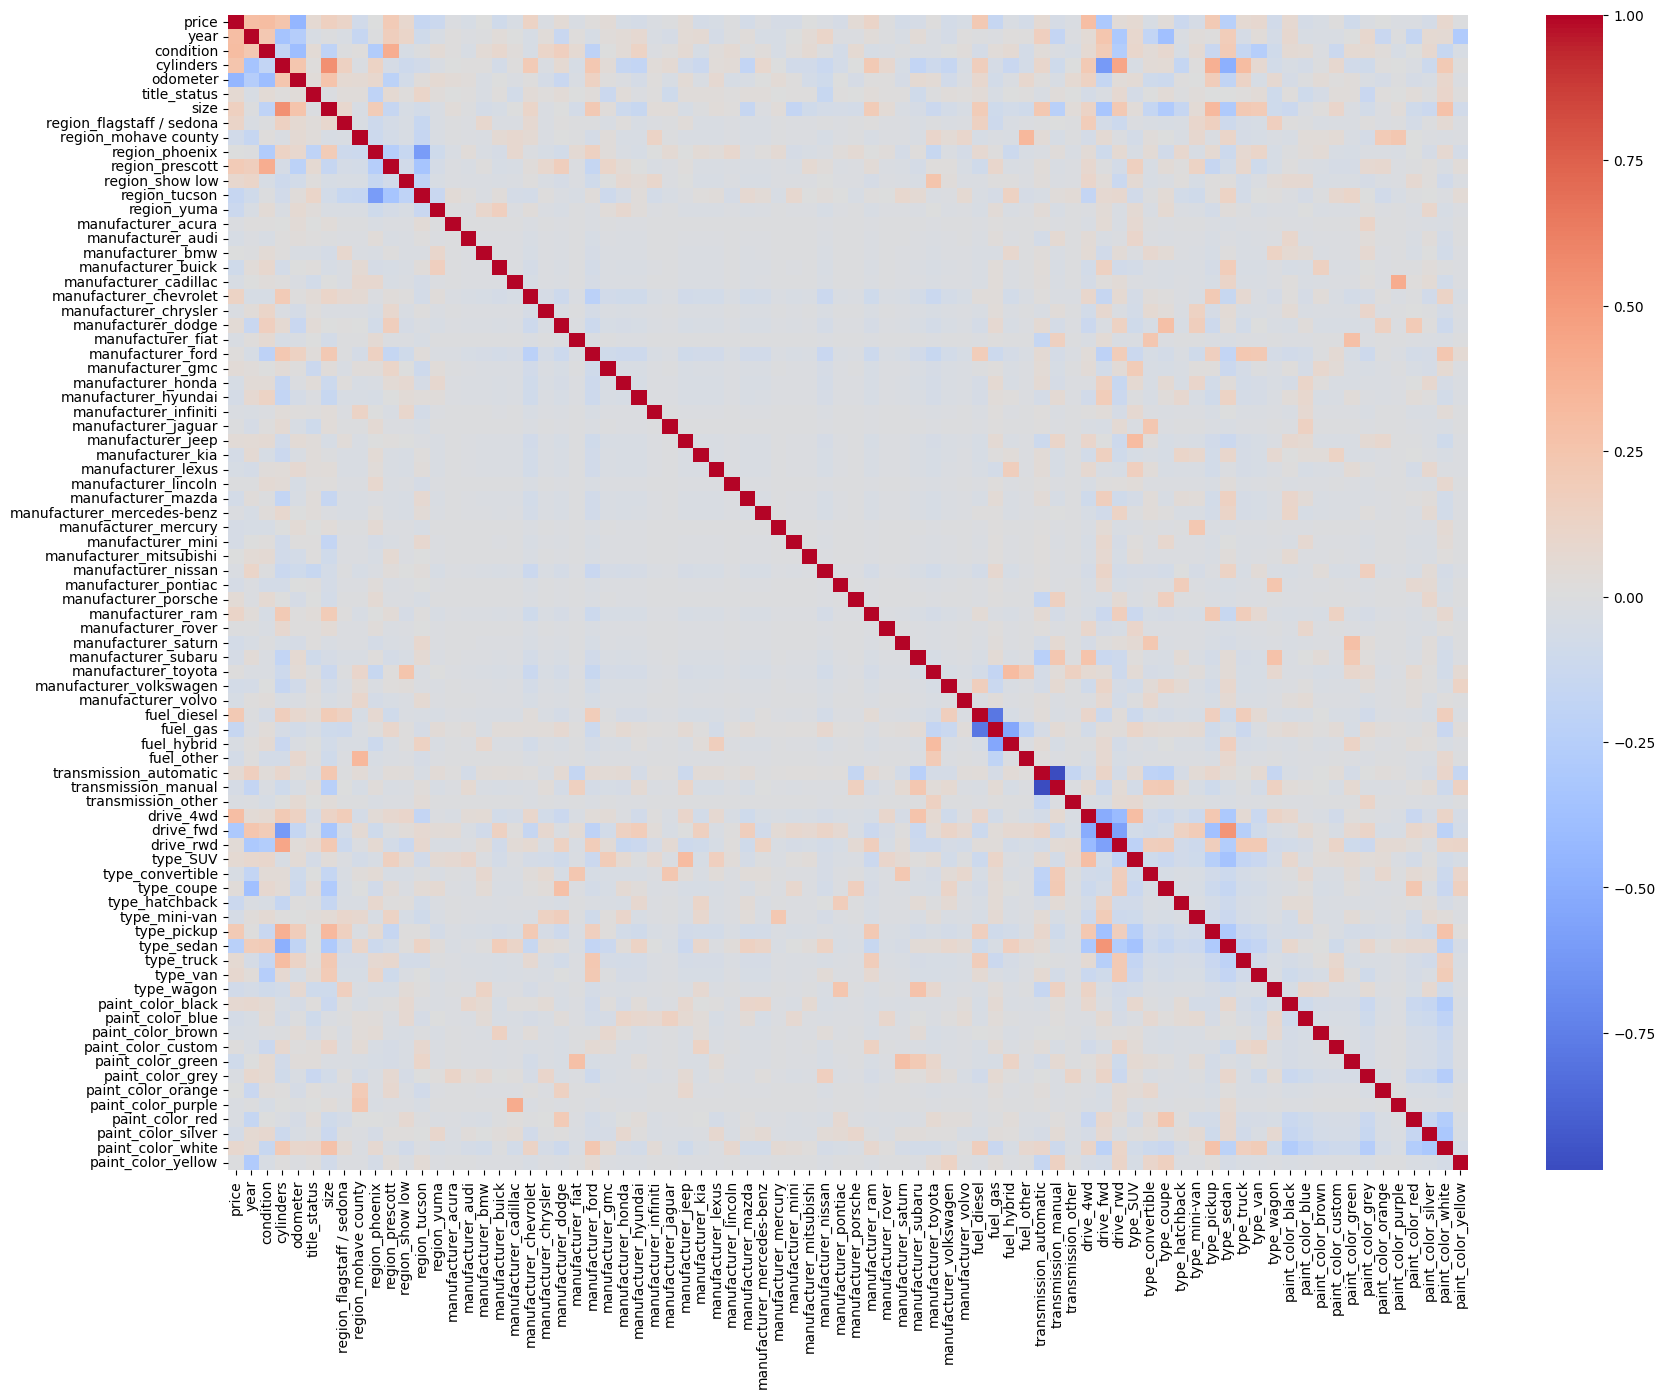

In [203]:
# Creates a correlation matrix plot heatmap

# Compute the correlation matrix
corr = df13.corr()

# Set up the matplotlib figure
plt.subplots(figsize=(20, 15))

sns.heatmap(corr, cmap='coolwarm')
plt.show()

Post correlation examination results: These are the strongest relationships, top six in relation to 'price': 
- condition                    0.307679
- year                         0.299753
- drive_4wd                    0.298136
- odometer                  -0.447139
- drive_fwd                 -0.308254
- type_sedan                -0.240358

Create the data sets; X and y based around a 'price' target

In [204]:
X = df13.drop('price', axis = 1)
y = df13['price']

In [205]:
X

,year,condition,cylinders,odometer,title_status,size,region_flagstaff / sedona,region_mohave county,region_phoenix,region_prescott,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2015,4,4,73000,4,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2007,3,8,155898,4,4,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2006,4,8,193410,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2004,5,6,106034,4,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,3,6,90547,4,4,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2016,4,8,66213,4,3,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
588,2019,5,6,32159,4,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
589,1976,3,4,44243,4,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
590,2015,4,8,54403,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [206]:
y

0      11995
1       9500
2      10995
3      15999
4      23995
       ...  
587    29999
588    25648
589    10000
590    46902
591     6350
Name: price, Length: 592, dtype: int32

In [207]:
print(type(y))

<class 'pandas.core.series.Series'>


Ran train_test_split function to create the four data sets pre modelling 

In [208]:
# data set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(X_train), type(y_train)) #should be DataFrame and Series

(414, 79)
(178, 79)
(414,)
(178,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [210]:
# log modifies the odometer data
odom = np.log1p(df13['odometer'])

A skewness value > 0 means that there is more weight in the left tail of the distribution (right-skewed). A skewness value < 0 means that there is more weight in the right tail of the distribution (left-skewed). A skewness value of 0 indicates a symmetric distribution.

At this point after the data prep, cleaning, exploriation along with considering the customer's objective, and considering the large number of features 80 and limited processing time and resources. I chose to do these key functions for future modeling actions:

- Pipelines consisting of the following
- Standard Scaler
- LASSO
- Linear Regression
- Ridge
- GridSearchCV with multiple alpha values



### Scalar Function Applied

Note: You will notice I applied the scaler here separately from a pipeline later so I could visually explore the data more effectively

In [213]:
# Note: I always do the scaler after splitting sets so test set does not get data leakage
# I fit the StandardScaler on your training data only.

scaler5 = StandardScaler()

X_train_scaled = scaler5.fit_transform(X_train) # This step combines two other steps into one
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)

# Note you should not fit the test data only the train data. Just transform the test data.
X_test_scaled = scaler5.transform(X_test)

# Convert NumPy arrays back to pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [214]:
X_test_scaled

,year,condition,cylinders,odometer,title_status,size,region_flagstaff / sedona,region_mohave county,region_phoenix,region_prescott,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,-0.481898,-1.081459,1.382101,1.061887,0.169253,0.872929,-0.165213,-0.165213,1.494783,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,1.354849,-0.069673
1,0.465123,0.279404,-1.063155,-0.278959,0.169253,-0.339798,-0.165213,-0.165213,-0.668994,-0.366397,...,7.625146,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,-0.738090,-0.069673
2,0.675573,0.279404,-1.063155,-0.925655,0.169253,-0.339798,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,2.275765,-0.738090,-0.069673
3,0.886022,0.279404,-1.063155,-1.432525,0.169253,-0.339798,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,1.354849,-0.069673
4,0.570348,0.279404,-1.063155,-0.663481,0.169253,-0.339798,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,1.354849,-0.069673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.886022,0.279404,0.159473,-0.383916,0.169253,0.872929,-0.165213,-0.165213,1.494783,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,-0.738090,-0.069673
174,0.780797,0.279404,-1.063155,-0.418785,0.169253,-0.339798,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,2.698148,-0.098773,0.0,-0.353553,-0.439413,-0.738090,-0.069673
175,-1.218471,0.279404,0.159473,0.431795,0.169253,-0.339798,-0.165213,6.052798,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,1.354849,-0.069673
176,-0.376674,0.279404,0.159473,-0.132333,0.169253,-0.339798,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,2.275765,-0.738090,-0.069673


In [215]:
X_train_scaled

,year,condition,cylinders,odometer,title_status,size,region_flagstaff / sedona,region_mohave county,region_phoenix,region_prescott,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,-1.955043,-1.081459,-1.063155,1.905826,0.169253,-2.765251,-0.165213,-0.165213,-0.668994,2.729282,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,-0.738090,14.352700
1,-0.061000,0.279404,-0.451841,-0.523654,0.169253,-0.339798,-0.165213,-0.165213,-0.668994,2.729282,...,-0.131145,-0.140372,-0.140372,2.698148,-0.098773,0.0,-0.353553,-0.439413,-0.738090,-0.069673
2,0.359899,-1.081459,0.159473,-0.132910,0.169253,0.872929,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,7.123903,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,-0.738090,-0.069673
3,0.359899,0.279404,0.159473,1.285661,0.169253,0.872929,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,2.698148,-0.098773,0.0,-0.353553,-0.439413,-0.738090,-0.069673
4,0.465123,-1.081459,-1.063155,0.213090,0.169253,0.872929,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,1.354849,-0.069673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0.675573,0.279404,0.159473,-1.435041,0.169253,-0.339798,-0.165213,-0.165213,1.494783,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,1.354849,-0.069673
410,-0.692348,0.279404,0.159473,1.414896,0.169253,0.872929,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,2.275765,-0.738090,-0.069673
411,0.465123,0.279404,0.159473,0.621627,0.169253,0.872929,-0.165213,-0.165213,-0.668994,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,1.354849,-0.069673
412,-1.113246,0.279404,2.604729,3.009299,0.169253,0.872929,-0.165213,-0.165213,1.494783,-0.366397,...,-0.131145,-0.140372,-0.140372,-0.370625,-0.098773,0.0,-0.353553,-0.439413,-0.738090,-0.069673


Explored the data by determining the max and min values post scaling to help select potential alpha values.

In [216]:

# Find the smallest value
min_value = X_train_scaled.min().min()

# Find the largest value
max_value = X_train_scaled.max().max()

print(f"The smallest value in the DataFrame is: {min_value}")
print(f"The largest value in the DataFrame is: {max_value}")


The smallest value in the DataFrame is: -8.47896980697221
The largest value in the DataFrame is: 20.322401432901575


### Evaluation of Hypotheses

Based on my intial Data Understanding and Hypotheses at the beginning of this exercise here are my Findings:

|Initial Hypothesis                                                        |   Finding                               |
|:-------------------------------------------------------------------------|:----------------------------------------|
|Size of vehicle will increase the price of the car                        |Larger the car the higher the sales price           |
|Condition of the vehicle would increase the price of the car              |Worse the condition lower the sales price            
|Brands considered luxury of vehicles would increase the price of the car  |Not enough data to determine relationship to sales price.           
|Engine size could increase the vehicle price of the car                   |Larget the engine cyclinders indicates a likely higher sales price   |
|Age of the car impacts price, with the younger being more valuable        |The older the care the lower the sales price.   |



The question that still remains at this point is to what maginitude each of these impact sales price. The modelling below will assist with that analysis.

# Modeling


*With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.*

### Pipeline for Linear Regression, LASSO, and Ridge Models

In [217]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd

In [218]:
# Create a StandardScaler object
scaler = StandardScaler()

# Create a PCA object
pca = PCA(n_components=10)

# Create models
lasso = Lasso(max_iter=100000)
ridge = Ridge(max_iter=100000)
linear = LinearRegression()

# Create an RFE selector object using Linear Regression as the estimator
#rfe = RFE(estimator=linear, n_features_to_select=10, step=1)

# Make pipelines with RFE
lasso_pipe = make_pipeline(scaler, lasso)
ridge_pipe = make_pipeline(scaler, ridge)
#linear_pipe = make_pipeline(scaler, rfe, linear)
linear_pipe = make_pipeline(scaler, pca, linear)

# Define a list of alphas
alphas = [0.1, 1, 10, 100, 300, 400]

# Define a grid of hyperparameters
param_grid = {'lasso__alpha': alphas, 'ridge__alpha': alphas}

# Create a GridSearchCV object for each model
lasso_grid = GridSearchCV(lasso_pipe, param_grid={'lasso__alpha': alphas}, cv=5)

ridge_grid = GridSearchCV(ridge_pipe, param_grid={'ridge__alpha': alphas}, cv=5)

# Fit the models
lasso_result = lasso_grid.fit(X_train, y_train)
ridge_result = ridge_grid.fit(X_train, y_train)
linear_result = linear_pipe.fit(X_train, y_train)

# Print the best alpha and corresponding score for each model
print("Lasso: Best Alpha =", lasso_result.best_params_['lasso__alpha'], "Best Score =", lasso_result.best_score_)
print("Ridge: Best Alpha =", ridge_result.best_params_['ridge__alpha'], "Best Score =", ridge_result.best_score_)

# Predict on the test set
lasso_pred = lasso_result.predict(X_test)
ridge_pred = ridge_result.predict(X_test)
linear_pred = linear_result.predict(X_test)

# Calculate the RMSE for each model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

# Print the RMSE for each model
print("Lasso RMSE: ", lasso_rmse)
print("Ridge RMSE: ", ridge_rmse)
print("Linear Regression RMSE: ", linear_rmse)

# Calculate the R-squared for each model
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Print the R-squared for each model
print("Lasso R-squared: ", lasso_r2)
print("Ridge R-squared: ", ridge_r2)
print("Linear Regression R-squared: ", linear_r2)

Lasso: Best Alpha = 300 Best Score = 0.6018733596676553
Ridge: Best Alpha = 100 Best Score = 0.5741506502854968
Lasso RMSE:  8783.498955889085
Ridge RMSE:  8300.890585791409
Linear Regression RMSE:  9556.164314197553
Lasso R-squared:  0.41578476470720105
Ridge R-squared:  0.4782203353552461
Linear Regression R-squared:  0.3084796138753092


R-squared values range from 0 to 1. An R-squared of 100% indicates that all changes in the dependent variable are completely explained by changes in the independent variables. Conversely, an R-squared of 0% indicates that the independent variables explain none of the variability of the dependent variable.

In [219]:

# Get the feature names
feature_names = X_train.columns

# Get the PCA object from the pipeline
pca = linear_pipe.named_steps['pca']

# List of top 5 principal components
top_pcs = [0, 1, 2, 3, 4]  # 0-indexed



# Get the coefficients of the best models
lasso_coef = lasso_result.best_estimator_.named_steps['lasso'].coef_
ridge_coef = ridge_result.best_estimator_.named_steps['ridge'].coef_
linear_coef = linear_pipe.named_steps['linearregression'].coef_

# Create a DataFrame for each model's coefficients
lasso_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coef})
ridge_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coef})
linear_df = pd.DataFrame({'Component': ["PC" + str(i+1) for i in range(len(linear_coef))], 'Coefficient': linear_coef})


# Sort the DataFrames by the absolute value of the coefficients and get the top 5
lasso_top5 = lasso_df.reindex(lasso_df.Coefficient.abs().sort_values(ascending=False).index).head(5)
ridge_top5 = ridge_df.reindex(ridge_df.Coefficient.abs().sort_values(ascending=False).index).head(5)
linear_top5 = linear_df.reindex(linear_df.Coefficient.abs().sort_values(ascending=False).index).head(5)

# Print the top 5 features for each model
print("Lasso Top 5 Features:\n", lasso_top5)
print("Ridge Top 5 Features:\n", ridge_top5)
print("Linear Regression Top 5 Principal Components:\n", linear_top5)

Lasso Top 5 Features:
       Feature  Coefficient
3    odometer -5306.317585
2   cylinders  2331.473972
0        year  2324.083411
55  drive_fwd -1448.628330
1   condition  1447.022483
Ridge Top 5 Features:
        Feature  Coefficient
3     odometer -4294.586313
0         year  2075.053632
1    condition  1869.331420
2    cylinders  1496.425415
63  type_sedan -1191.156081
Linear Regression Top 5 Principal Components:
   Component  Coefficient
5       PC6 -1966.967740
6       PC7  1914.172969
4       PC5 -1685.658004
2       PC3  1350.880892
3       PC4 -1014.298172


### Key Finding: The LASSO was the best model with based on Best Alpha, RMSE and R-Squared. The top sales price impacting factors it found were:
Feature  Coefficient
-  odometer -5306.317585
-  cylinders  2331.473972
-  year  2324.083411
-  drive_fwd -1448.628330
-  condition  1447.022483

# Deployment

*Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.*

The following recommendations are based on the customer data provided for the state of Arizona with the objective of determining which factors (features) most impact pricing negatively and positively where by the dealership and better market and negotiate car sales. Here is a list of the top impacting pricing factors from most to least.  To make the modeling and analysis data easier to apply to marketing and negotiation stratgies they have been factored by magnitude with a positive or negative indicator applied.  For example, 3 + in contrast to 0 means that factor will impact the price three times in benefit to that impact of that factor on increasing the price of the sale price.

| Recommendation  | Action |Magnitude|
|:-------|:-----|:--------|
| Pricing Strategy One  |  Mileage of a vehicle is the top factor in reducing the sales price for a vehicle, the higher the lower the sales price | -5.3|
| Pricing Strategy Two | If a vehicle has more cylinders and a larger engine it increase the sale price    | +2.3 |
| Pricing Strategy Three | The year of the vehicle will effect sale price, the younger the vehicle the higher the sales price    | +2.3 |
| Pricing Strategy Four  | Front wheel drive of a vehicle is a top factor in decreasing the sales price of a vehicle, if on vehicle sales price higher|-1.4  |
| Pricing Strategy Five | The condition of a vehicle has a major effect on a vehicle's price, the better the condition the higher the sales price  | +1.4|
